In [2]:
import pandas
dataset = pandas.read_csv('titanic_train.csv')

In [3]:
print(dataset.info())
print(dataset.columns)
print(dataset.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2

In [4]:
y = dataset['Survived']
X  = dataset[ ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked']]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

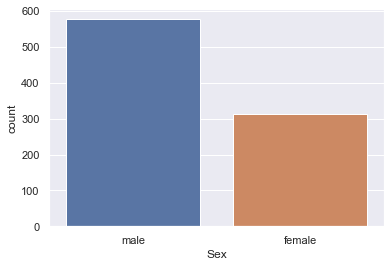

In [19]:
#feature selection using seaborn 
import seaborn as sns
sns.set() #better look and feel
gender = dataset['Sex']
print(gender)
sns.countplot(gender)
#categorical?
#bar graph


In [5]:
sns.countplot(y)

NameError: name 'sns' is not defined

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

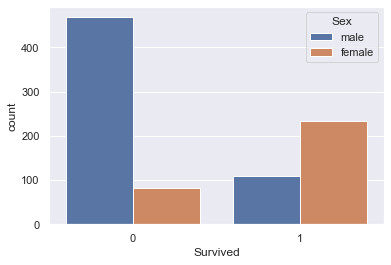

In [20]:
sns.countplot(y, hue= gender)
#from the graph, we can conclude that gender is corelated with y
#if the graph shows equal bars for all categories, then that feature does'nt affect y


In [ ]:
sns.countplot(dataset['Survived'], hue= 'Pclass', data = dataset)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

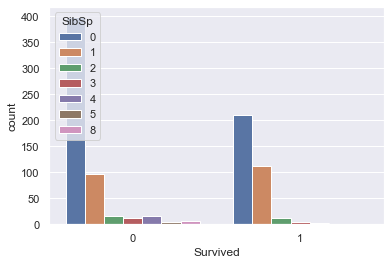

In [26]:
 sns.countplot(dataset['Survived'], hue= 'SibSp', data = dataset)
    #we can conclude from the graph that the Sibsp has
    #very less weight y does not depend much on y
    #but it is impacting y to some extent
    #now it is your choice whether you want to eleminate this feature
    #won't impact the accuracy much

In [ ]:
dataset.isnull()

In [ ]:
sns.heatmap(dataset.isnull(), cbar = False, yticklabels = False)

C:\Users\dhruv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

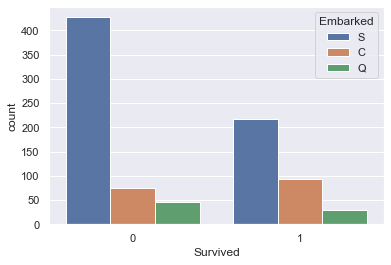

In [35]:
 sns.countplot(dataset['Survived'], hue= 'Embarked', data = dataset)

In [ ]:
age = dataset['Age']
avg = age.mean()
print(avg)

In [ ]:
#exel for average of age for different classes
c1 = 38
c2 = 29
c3 = 25

In [41]:
def miss(col):
    age = col[0]
    pclass = col[1]
    if pandas.isnull(age):
        if pclass == 1:
            return c1
        elif pclass == 2:
            return c2
        elif pclass == 3:
            return c3
        else: 
            print("Not supported")
    else:
        return age
imputated_age = X[['Age', 'Pclass']].apply(miss, axis = 1)
X['Age'] = imputated_age

<ipython-input-41-a9b19bef0066>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = impute_age


In [ ]:
sns.heatmap(X.isnull(), cbar = False, yticklabels = False)

In [ ]:
#now, all the features except age are categorical.
X

In [ ]:
sex = pandas.get_dummies(X['Sex'], drop_first= True)
pclass = pandas.get_dummies(X['Pclass'], drop_first= True)
sibsp = pandas.get_dummies(X['Sibsp'], drop_first= True)
parch = pandas.get_dummies(X['Parch'], drop_first= True)
embarked = pandas.get_dummies(X['Embarked'], drop_first= True)

#horizontal stack in numpy is similar to concat in pandas
pandas.concat([sex, pclass, sibsp, parch, embarked], axis = 1)
from sklearn.model_selection import train_test_split

from sklearn.liner_model import LogisticRegression
model = LogisticRegression()
model.predict()